In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
from shapely.geometry import Point

In [3]:
def dms2dd(d,m,s):
    if d < 0.:
        return 360.+d+(m+(s/60.))/60.
    else:
        return d+(m+(s/60.))/60.

In [4]:
map_proj = ccrs.AzimuthalEquidistant()

In [179]:
station_ll = Point(dms2dd(5.,19.,28.),dms2dd(60.,23.,22.))
station_coord = map_proj.project_geometry( station_ll )
iscoastal = False

In [192]:
shpfilename = shpreader.natural_earth(category='physical', name='land')
reader = shpreader.Reader(shpfilename)
landpolys = reader.records()

ngeom = 0
for land in landpolys:
    geom = land.geometry
    lonmin, latmin, lonmax, latmax = geom.bounds
    if latmax > 65.:
        #geom_eq = map_proj.project_geometry(geom)
        iscoastal = iscoastal | (not geom.buffer(-0.25).contains(station_ll))
        
print (iscoastal)
#help(geom)



True


In [206]:
shpfilename = shpreader.natural_earth(category='physical', name='ocean')
reader = shpreader.Reader(shpfilename)
oceans = reader.records()

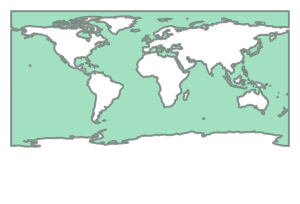

In [199]:
geom = next(oceans).geometry
geom.buffer(0.25)

In [207]:
for ocean in oceans:
    print (ocean.geometry.buffer(0.25).contains(station_ll))


False
True


In [185]:
#map_proj.project_geometry(geom).buffer(10000).contains()
#geom.contains(Point(30.,0.))
geom_aea = map_proj.project_geometry(geom)
point = Point(100.,50.)
point_aea = map_proj.project_geometry(point)

print (geom.buffer(-10./60.).contains(station_ll))
print (geom_aea.contains(point_aea))

False
False


In [164]:
print (geom.bounds)
map_proj.project_geometry(Point(geom.bounds[0],geom.bounds[1])).xy

(-17.62499999999997, -34.81909179687497, 180.00000000000014, 77.69787597656253)


(array('d', [-1712711.656733217]), array('d', [-3909874.9958189074]))

In [152]:
point_aea.xy

(array('d', [6841994.910639459]), array('d', [8257299.193453299]))

In [423]:
import cartopy.feature as cfeature

ocean = cfeature.NaturalEarthFeature('physical','ocean','110m')
geom = ocean.geometries()

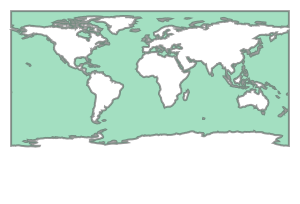

In [425]:
next(geom)

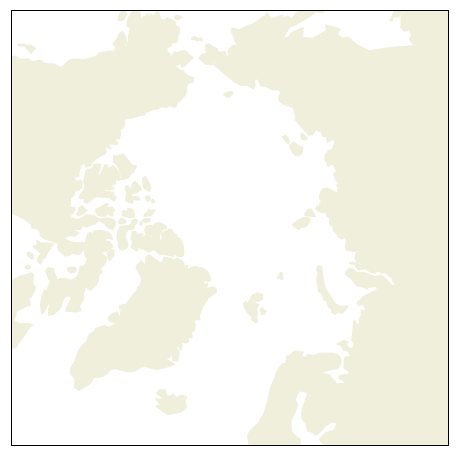

In [190]:
import matplotlib.pyplot as plt
import cartopy.feature as cfeature

#x, y = station_coord.xy
cx, cy = geom_aea.geoms[1].exterior.xy
#cx, cy = geom_eq.geoms[0].xy
#bx, by = geom_eq.geoms[0].buffer(5000.).boundary.xy

fig = plt.figure(figsize=(8,8))
ax = plt.subplot(projection=ccrs.NorthPolarStereo())
#ax.set_extent([-5.,15.,50.,65.], ccrs.PlateCarree())
ax.set_extent([-180,180,60.,90.], ccrs.PlateCarree())

#ax.plot(x, y, marker='o', ms=20, transform=map_proj, zorder=3)
#ax.plot(cx, cy, color='r', transform=map_proj)
#ax.plot(bx, by, color='b', transform=map_proj)

ax.add_feature(cfeature.LAND)

In [363]:
from shapely.geometry import LineString, Polygon, Point

True


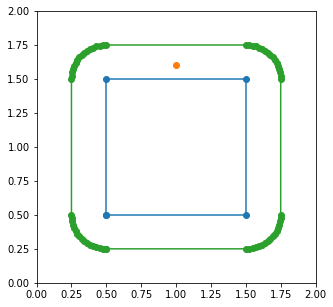

In [373]:
def plot_coords(ax, obj):
    
    x, y = obj.xy
    
    if obj is Point:
        ax.plot(x, y, 'o')
    else:
        ax.plot(x, y, 'o-')

coords = [(0.5, 0.5), (0.5,1.5), (1.5,1.5), (1.5,0.5)]
poly = Polygon(coords)
point = Point(1.,1.6)

fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(0.,2.)
ax.set_ylim(0.,2.)

plot_coords(ax, poly.exterior)
plot_coords(ax, point)
plot_coords(ax, poly.buffer(0.25).exterior)

#points = [Point((0.5,0.5)), Point((0., 0.5))]
print (poly.buffer(0.25).contains(point))

In [352]:
b = x.buffer(0.5)
isin = [b.contains(p) for p in points]
isin

[True, True]

In [173]:
300./60.

5.0